# Import libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support, f1_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, RobustScaler, MinMaxScaler
from numpy import argmax
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFE
import itertools
import cv2
import pydotplus
from io import StringIO

# Fetch data from drive

In [2]:
#from google.colab import drive
#drive.mount('/content/drive/')
#d1=pd.read_csv('/content/drive/MyDrive/Cyber Analytics/cic ids 2017/TrafficLabelling/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv');
#d2=pd.read_csv('/content/drive/MyDrive/Cyber Analytics/cic ids 2017/TrafficLabelling/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv');
#d3=pd.read_csv('/content/drive/MyDrive/Cyber Analytics/cic ids 2017/TrafficLabelling/Friday-WorkingHours-Morning.pcap_ISCX.csv');
#d4=pd.read_csv('/content/drive/MyDrive/Cyber Analytics/cic ids 2017/TrafficLabelling/Monday-WorkingHours.pcap_ISCX.csv');
#d5=pd.read_csv('/content/drive/MyDrive/Cyber Analytics/cic ids 2017/TrafficLabelling/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv');
#d6=pd.read_csv('/content/drive/MyDrive/Cyber Analytics/cic ids 2017/TrafficLabelling/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv', nrows=170366,encoding = 'unicode_escape');
#d7=pd.read_csv('/content/drive/MyDrive/Cyber Analytics/cic ids 2017/TrafficLabelling/Tuesday-WorkingHours.pcap_ISCX.csv');
#d8=pd.read_csv('/content/drive/MyDrive/Cyber Analytics/cic ids 2017/TrafficLabelling/Wednesday-workingHours.pcap_ISCX.csv');


# Fetch files from local storage

In [3]:
d1=pd.read_csv('C:\Yash_MS\sem 2\ML in cyber analytics CMPE 789\TrafficLabelling/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv');
d2=pd.read_csv('C:\Yash_MS\sem 2\ML in cyber analytics CMPE 789\TrafficLabelling/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv');
d3=pd.read_csv('C:\Yash_MS\sem 2\ML in cyber analytics CMPE 789\TrafficLabelling/Friday-WorkingHours-Morning.pcap_ISCX.csv');
d4=pd.read_csv('C:\Yash_MS\sem 2\ML in cyber analytics CMPE 789\TrafficLabelling/Monday-WorkingHours.pcap_ISCX.csv');
d5=pd.read_csv('C:\Yash_MS\sem 2\ML in cyber analytics CMPE 789\TrafficLabelling/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv');
d6=pd.read_csv('C:\Yash_MS\sem 2\ML in cyber analytics CMPE 789\TrafficLabelling/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv', nrows=170366,encoding = 'unicode_escape');
d7=pd.read_csv('C:\Yash_MS\sem 2\ML in cyber analytics CMPE 789\TrafficLabelling/Tuesday-WorkingHours.pcap_ISCX.csv');
d8=pd.read_csv('C:\Yash_MS\sem 2\ML in cyber analytics CMPE 789\TrafficLabelling/Wednesday-workingHours.pcap_ISCX.csv');


In [4]:
frames = [d1,d2,d3,d4,d5,d6,d7,d8]
d = pd.concat(frames)
d.shape

(2830743, 85)

In [5]:
print(d.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2830743 entries, 0 to 692702
Data columns (total 85 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   Flow ID                       object 
 1    Source IP                    object 
 2    Source Port                  int64  
 3    Destination IP               object 
 4    Destination Port             int64  
 5    Protocol                     int64  
 6    Timestamp                    object 
 7    Flow Duration                int64  
 8    Total Fwd Packets            int64  
 9    Total Backward Packets       int64  
 10  Total Length of Fwd Packets   float64
 11   Total Length of Bwd Packets  float64
 12   Fwd Packet Length Max        float64
 13   Fwd Packet Length Min        float64
 14   Fwd Packet Length Mean       float64
 15   Fwd Packet Length Std        float64
 16  Bwd Packet Length Max         float64
 17   Bwd Packet Length Min        float64
 18   Bwd Packet Length Mean

# drop NAN, INF values as the toal number of rows containing these values are only about 2800 from the total of 2830743 rows

In [6]:
d.replace([np.inf, -np.inf], np.nan, inplace=True)
# Drop rows with NaN
d.dropna(inplace=True)
print(d)

                                         Flow ID       Source IP  \
0        192.168.10.5-104.16.207.165-54865-443-6  104.16.207.165   
1          192.168.10.5-104.16.28.216-55054-80-6   104.16.28.216   
2          192.168.10.5-104.16.28.216-55055-80-6   104.16.28.216   
3        192.168.10.16-104.17.241.25-46236-443-6   104.17.241.25   
4        192.168.10.5-104.19.196.102-54863-443-6  104.19.196.102   
...                                          ...             ...   
692698    192.168.10.3-192.168.10.14-53-51114-17   192.168.10.14   
692699    192.168.10.3-192.168.10.16-53-24054-17   192.168.10.16   
692700  192.168.10.51-23.208.163.130-58030-443-6  23.208.163.130   
692701    192.168.10.3-192.168.10.14-53-51694-17   192.168.10.14   
692702    192.168.10.3-192.168.10.14-53-57949-17   192.168.10.14   

         Source Port  Destination IP   Destination Port   Protocol  \
0                443    192.168.10.5              54865          6   
1                 80    192.168.10.5       

In [7]:
#check for any null values in the dataset
d.isnull().sum().sum()

0

# Lets look at the categorical feature ' Destination Port'.

array([[<AxesSubplot:title={'center':' Destination Port'}>]], dtype=object)

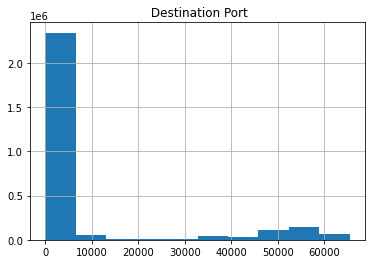

In [8]:
d.hist(column=" Destination Port")

Text(0.5, 1.0, 'Top 10 ports')

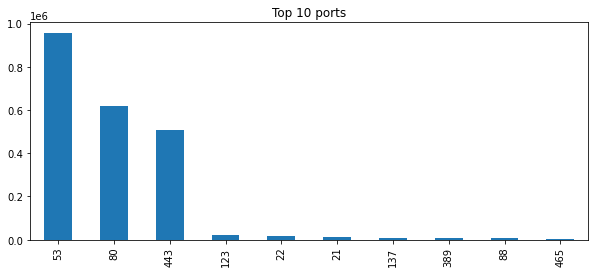

In [9]:
top_10 = d[' Destination Port'].value_counts()[:10]
top_10.plot(kind='bar', figsize=(10,4))
plt.title('Top 10 ports')

# Aggregating function for Destination Port.

In [9]:
from collections import Counter
def cumulatively_categorise(column,threshold=0.90,return_categories_list=True):
  #Find the threshold value using the percentage and number of instances in the column
  threshold_value=int(threshold*len(column))
  #Initialise an empty list for our new minimised categories
  categories_list=[]
  #Initialise a variable to calculate the sum of frequencies
  s=0
  #Create a counter dictionary of the form unique_value: frequency
  counts=Counter(column)

  #Loop through the category name and its corresponding frequency after sorting the categories by descending order of frequency
  for i,j in counts.most_common():
    #Add the frequency to the global sum
    s+=dict(counts)[i]
    #Append the category name to the list
    categories_list.append(i)
    #Check if the global sum has reached the threshold value, if so break the loop
    if s>=threshold_value:
      break
  #Append the category Other to the list
  categories_list.append('100000')

  #Replace all instances not in our new categories by Other  
  new_column=column.apply(lambda x: x if x in categories_list else '100000')

  #Return transformed column and unique values if return_categories=True
  if(return_categories_list):
    return new_column,categories_list
  #Return only the transformed column if return_categories=False
  else:
    return new_column


#Call the function with a default threshold of 90%
transformed_column,new_category_list=cumulatively_categorise(d[' Destination Port'],return_categories_list=True)


In [10]:
transformed_column

0         100000
1          55054
2          55055
3         100000
4          54863
           ...  
692698        53
692699        53
692700    100000
692701        53
692702        53
Name:  Destination Port, Length: 2827876, dtype: object

In [11]:
d

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.10.5-104.16.207.165-54865-443-6,104.16.207.165,443,192.168.10.5,54865,6,7/7/2017 3:30,3,2,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,192.168.10.5-104.16.28.216-55054-80-6,104.16.28.216,80,192.168.10.5,55054,6,7/7/2017 3:30,109,1,1,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,192.168.10.5-104.16.28.216-55055-80-6,104.16.28.216,80,192.168.10.5,55055,6,7/7/2017 3:30,52,1,1,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,192.168.10.16-104.17.241.25-46236-443-6,104.17.241.25,443,192.168.10.16,46236,6,7/7/2017 3:30,34,1,1,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,192.168.10.5-104.19.196.102-54863-443-6,104.19.196.102,443,192.168.10.5,54863,6,7/7/2017 3:30,3,2,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692698,192.168.10.3-192.168.10.14-53-51114-17,192.168.10.14,51114,192.168.10.3,53,17,5/7/2017 12:10,32215,4,2,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
692699,192.168.10.3-192.168.10.16-53-24054-17,192.168.10.16,24054,192.168.10.3,53,17,5/7/2017 3:02,324,2,2,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
692700,192.168.10.51-23.208.163.130-58030-443-6,23.208.163.130,443,192.168.10.51,58030,6,5/7/2017 10:06,82,2,1,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
692701,192.168.10.3-192.168.10.14-53-51694-17,192.168.10.14,51694,192.168.10.3,53,17,5/7/2017 1:19,1048635,6,2,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [12]:
d.isnull().sum().sum()

0

In [13]:
d = d.drop(columns = [' Destination Port'])
d

,Flow ID,Source IP,Source Port,Destination IP,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.10.5-104.16.207.165-54865-443-6,104.16.207.165,443,192.168.10.5,6,7/7/2017 3:30,3,2,0,12.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,192.168.10.5-104.16.28.216-55054-80-6,104.16.28.216,80,192.168.10.5,6,7/7/2017 3:30,109,1,1,6.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,192.168.10.5-104.16.28.216-55055-80-6,104.16.28.216,80,192.168.10.5,6,7/7/2017 3:30,52,1,1,6.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,192.168.10.16-104.17.241.25-46236-443-6,104.17.241.25,443,192.168.10.16,6,7/7/2017 3:30,34,1,1,6.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,192.168.10.5-104.19.196.102-54863-443-6,104.19.196.102,443,192.168.10.5,6,7/7/2017 3:30,3,2,0,12.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692698,192.168.10.3-192.168.10.14-53-51114-17,192.168.10.14,51114,192.168.10.3,17,5/7/2017 12:10,32215,4,2,112.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
692699,192.168.10.3-192.168.10.16-53-24054-17,192.168.10.16,24054,192.168.10.3,17,5/7/2017 3:02,324,2,2,84.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
692700,192.168.10.51-23.208.163.130-58030-443-6,23.208.163.130,443,192.168.10.51,6,5/7/2017 10:06,82,2,1,31.0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
692701,192.168.10.3-192.168.10.14-53-51694-17,192.168.10.14,51694,192.168.10.3,17,5/7/2017 1:19,1048635,6,2,192.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


# Dropping the columns which are insignificant. The values in these columns are all zero or a constant value throught the column

In [14]:
d = d.drop(columns = [' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags', ' CWE Flag Count', 'Fwd Avg Bytes/Bulk', ' Fwd Avg Packets/Bulk', ' Fwd Avg Bulk Rate', ' Bwd Avg Bytes/Bulk', ' Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate'])

# Making X and y from dataset.

In [15]:
le = LabelEncoder()
d.iloc[:, -1] = le.fit_transform(d.iloc[:, -1])
y = d.iloc[:, -1]
y


0         0
1         0
2         0
3         0
4         0
         ..
692698    0
692699    0
692700    0
692701    0
692702    0
Name:  Label, Length: 2827876, dtype: int32

In [16]:
xd = d.drop(columns = [' Label'])
X = xd.iloc[:, 6:74]
X

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,3,2,0,12.0,0.0,6.0,6.0,6.0,0.00000,0.0,...,1,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,109,1,1,6.0,6.0,6.0,6.0,6.0,0.00000,6.0,...,0,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,52,1,1,6.0,6.0,6.0,6.0,6.0,0.00000,6.0,...,0,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,34,1,1,6.0,6.0,6.0,6.0,6.0,0.00000,6.0,...,0,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3,2,0,12.0,0.0,6.0,6.0,6.0,0.00000,0.0,...,1,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692698,32215,4,2,112.0,152.0,28.0,28.0,28.0,0.00000,76.0,...,3,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
692699,324,2,2,84.0,362.0,42.0,42.0,42.0,0.00000,181.0,...,1,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
692700,82,2,1,31.0,6.0,31.0,0.0,15.5,21.92031,6.0,...,0,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
692701,1048635,6,2,192.0,256.0,32.0,32.0,32.0,0.00000,128.0,...,5,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Feature selection - we are trying out 2 types of feature selection methods.
# 1. RFE
# 2. ANOVA - (scroll down to ANOVA from here to use that)

# Feature selection using Reccursive feature elimination which uses Random Forest.

In [17]:
#X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 0,stratify = y)

In [18]:
##Feature Selection

rfc = RandomForestClassifier(n_estimators=10);

## fit random forest classifier on the training set
rfc.fit(X_train, y_train);

## extract important features
score = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'feature':X_train.columns,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

## plot importances
plt.rcParams['figure.figsize'] = (11, 4)
importances.plot.bar();


# Handpick features which have importance > 0.2 (about 20 features)

In [17]:
X = X[[' Packet Length Variance', 'Init_Win_bytes_forward', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', ' Packet Length Std']]
X
X_features = X.columns.tolist()

X['Dest'] = transformed_column.astype(str).astype(int)
X

<ipython-input-17-b014e1b85f0d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Dest'] = transformed_column.astype(str).astype(int)


,Packet Length Variance,Init_Win_bytes_forward,Bwd Packet Length Mean,Bwd Packet Length Std,Packet Length Std,Dest
0,0.000000,33,0.0,0.0,0.000000,100000
1,0.000000,29,6.0,0.0,0.000000,55054
2,0.000000,29,6.0,0.0,0.000000,55055
3,0.000000,31,6.0,0.0,0.000000,100000
4,0.000000,32,0.0,0.0,0.000000,54863
...,...,...,...,...,...,...
692698,548.571429,-1,76.0,0.0,23.421602,53
692699,5796.300000,-1,181.0,0.0,76.133435,53
692700,267.333333,1006,6.0,0.0,16.350331,100000
692701,1792.000000,-1,128.0,0.0,42.332021,53


Text(0.5, 1.0, 'Top 10 ports')

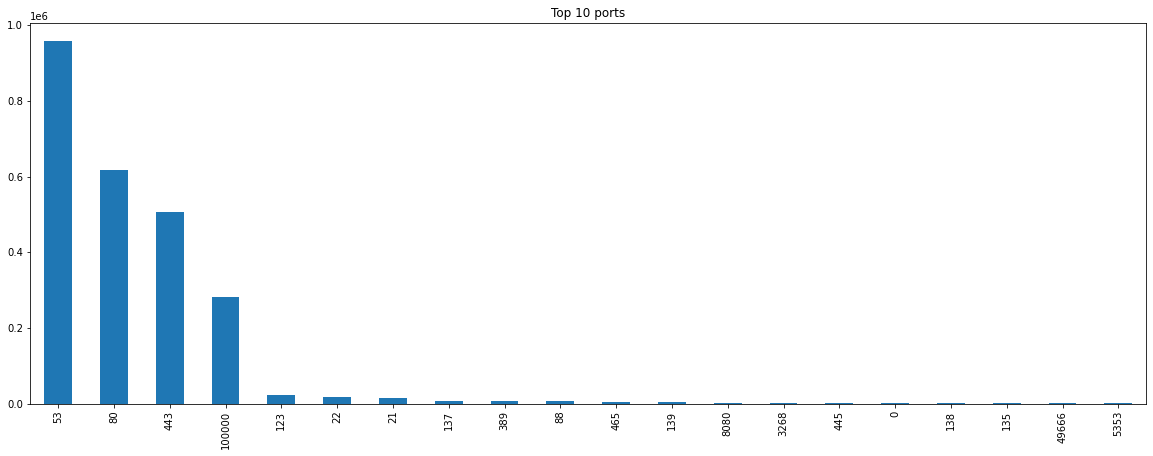

In [18]:
top_10 = X['Dest'].value_counts()[:20]
top_10.plot(kind='bar', figsize=(20,7))
plt.title('Top 10 ports')

# Robost scaling - it uses percentiles instead of min and max values of the column for scaling. This helps the distribution to not get affected by the outliers in the column but at the same time keeps the outliers as it is in the columns.

In [19]:
Scale = RobustScaler().fit(X[[' Packet Length Variance', 'Init_Win_bytes_forward', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', ' Packet Length Std']]
)
scaled = Scale.transform(X[[' Packet Length Variance', 'Init_Win_bytes_forward', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', ' Packet Length Std']]
)

X[[' Packet Length Variance', 'Init_Win_bytes_forward', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', ' Packet Length Std']] = pd.DataFrame(data = scaled, columns = X_features)
X['Dest'] = transformed_column.astype(str).astype(int)
X

C:\Users\yashs\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
<ipython-input-19-2ab19c1eb6bb>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Dest'] = transformed_column.astype(str).astype(int)


,Packet Length Variance,Init_Win_bytes_forward,Bwd Packet Length Mean,Bwd Packet Length Std,Packet Length Std,Dest
0,-0.022500,-0.026608,-0.402235,0.000000,-0.150000,100000
1,-0.022500,-0.027096,-0.368715,0.000000,-0.150000,55054
2,-0.022500,-0.027096,-0.368715,0.000000,-0.150000,55055
3,-0.022500,-0.026852,-0.368715,0.000000,-0.150000,100000
4,-0.022500,-0.026730,-0.402235,0.000000,-0.150000,54863
...,...,...,...,...,...,...
692698,0.016562,-0.030758,0.217877,0.000000,0.047642,53
692699,0.019210,-0.030758,0.184358,0.000000,0.054230,53
692700,0.010323,-0.030758,0.206704,0.000000,0.031172,100000
692701,-0.017204,-0.030758,0.008380,0.099085,-0.077225,53


In [18]:
X

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Dest
0,-0.009674,0.000000,-0.666667,-0.284091,-0.255187,-0.413333,0.111111,-0.636364,0.000000,-0.282143,...,-0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,256.205128
1,-0.009641,-0.333333,-0.333333,-0.318182,-0.242739,-0.413333,0.111111,-0.636364,0.000000,-0.260714,...,-0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,140.958974
2,-0.009659,-0.333333,-0.333333,-0.318182,-0.242739,-0.413333,0.111111,-0.636364,0.000000,-0.260714,...,-0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,140.961538
3,-0.009664,-0.333333,-0.333333,-0.318182,-0.242739,-0.413333,0.111111,-0.636364,0.000000,-0.260714,...,-0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,256.205128
4,-0.009674,0.000000,-0.666667,-0.284091,-0.255187,-0.413333,0.111111,-0.636364,0.000000,-0.282143,...,-0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,140.469231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2827871,0.000271,0.666667,0.000000,0.284091,0.060166,-0.120000,0.722222,-0.136364,0.000000,-0.010714,...,-0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.069231
2827872,-0.009575,0.000000,0.000000,0.125000,0.495851,0.066667,1.111111,0.181818,0.000000,0.364286,...,-0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.069231
2827873,-0.009649,0.000000,-0.333333,-0.176136,-0.242739,-0.080000,-0.055556,-0.420455,0.837838,-0.260714,...,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,256.205128
2827874,0.314057,1.333333,0.000000,0.738636,0.275934,-0.066667,0.833333,-0.045455,0.000000,0.175000,...,-0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.069231


# one hot encoding of Protocol

In [18]:
d[" Protocol"].value_counts()

6     1826704
17     999476
0        1696
Name:  Protocol, dtype: int64

In [19]:
le = LabelEncoder()
label_encoded = le.fit_transform(d[" Protocol"])
print(label_encoded)




[1 1 1 ... 1 2 2]


In [20]:
ohe = OneHotEncoder(sparse=False)
label_encoded = label_encoded.reshape(len(label_encoded), 1)
onehot_encoded = ohe.fit_transform(label_encoded)
onehot_encodedDF = pd.DataFrame(ohe.fit_transform(label_encoded))





In [21]:
onehot_encodedDF.rename(columns={0:'PROTOCOL 0',
                   1:'PROTOCOL 6',
                   2:'PROTOCOL 17'}, inplace = True)
onehot_encodedDF.head()

,PROTOCOL 0,PROTOCOL 6,PROTOCOL 17
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0


In [22]:
d.reset_index(drop=True, inplace=True)
X.reset_index(drop=True, inplace=True)

In [23]:
X = X.join(onehot_encodedDF)
X

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,PROTOCOL 0,PROTOCOL 6,PROTOCOL 17
0,-0.009674,0.000000,-0.666667,-0.284091,-0.255187,-0.413333,0.111111,-0.636364,0.000000,-0.282143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.009641,-0.333333,-0.333333,-0.318182,-0.242739,-0.413333,0.111111,-0.636364,0.000000,-0.260714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.009659,-0.333333,-0.333333,-0.318182,-0.242739,-0.413333,0.111111,-0.636364,0.000000,-0.260714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.009664,-0.333333,-0.333333,-0.318182,-0.242739,-0.413333,0.111111,-0.636364,0.000000,-0.260714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.009674,0.000000,-0.666667,-0.284091,-0.255187,-0.413333,0.111111,-0.636364,0.000000,-0.282143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2827871,0.000271,0.666667,0.000000,0.284091,0.060166,-0.120000,0.722222,-0.136364,0.000000,-0.010714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2827872,-0.009575,0.000000,0.000000,0.125000,0.495851,0.066667,1.111111,0.181818,0.000000,0.364286,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2827873,-0.009649,0.000000,-0.333333,-0.176136,-0.242739,-0.080000,-0.055556,-0.420455,0.837838,-0.260714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2827874,0.314057,1.333333,0.000000,0.738636,0.275934,-0.066667,0.833333,-0.045455,0.000000,0.175000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Split data in 70-30 ratio for classification

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 0,stratify = y)

In [ ]:
#decision tree
DT = DecisionTreeClassifier(random_state = 0)
DT.fit(X_train,y_train) 
DT_score=DT.score(X_test,y_test)
y_predict=DT.predict(X_test)
y_true=y_test
print('Accuracy of DT: '+ str(DT_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of DT: '+(str(precision)))
print('Recall of DT: '+(str(recall)))
print('F1-score of DT: '+(str(fscore)))
print(classification_report(y_true,y_predict))

In [ ]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_predict)
fig, ax = plt.subplots(figsize=(14, 14))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
        
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
fig.savefig('Confusion matrix.png')


In [29]:
tree.plot_tree(DT)

# ANOVA

In [ ]:
#for anova
X_features = X.columns.tolist()
Scale = RobustScaler().fit(X)
scaled = Scale.transform(X)


X = pd.DataFrame(data = scaled, columns = X_features)
X['Dest'] = transformed_column.astype(str).astype(int)
X

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 0,stratify = y)

In [25]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

from sklearn.feature_selection import f_classif
### Compute the ANOVA F-value 
f_value = f_classif(X_train, y_train)

# f_value = pd.Series(f_value)
# f_value.index = X_train.columns
# f_value.sort_values(ascending=False)

# ### plot the ordered f_value per feature
# f_value.sort_values(ascending=False).plot.bar(figsize=(20, 8))

### Now we select the top 10 important features based on the result above.
from sklearn.feature_selection import SelectKBest
sel_top_cols = SelectKBest(f_classif, k=20)
sel_top_cols.fit(X_train, y_train)
X_train.columns[sel_top_cols.get_support()]




Index([' Flow Duration', 'Bwd Packet Length Max', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', ' Flow IAT Std', ' Flow IAT Max',
       'Fwd IAT Total', ' Fwd IAT Std', ' Fwd IAT Max', ' Max Packet Length',
       ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance',
       ' PSH Flag Count', ' Average Packet Size', ' Avg Bwd Segment Size',
       'Idle Mean', ' Idle Max', ' Idle Min', 'PROTOCOL 6'],
      dtype='object')

In [27]:
X = X[[' Flow Duration', 'Bwd Packet Length Max', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', ' Flow IAT Std', ' Flow IAT Max',
       'Fwd IAT Total', ' Fwd IAT Std', ' Fwd IAT Max', ' Max Packet Length',
       ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance',
       ' PSH Flag Count', ' Average Packet Size', ' Avg Bwd Segment Size',
       'Idle Mean', ' Idle Max', ' Idle Min', 'PROTOCOL 6']]
X

,Flow Duration,Bwd Packet Length Max,Bwd Packet Length Mean,Bwd Packet Length Std,Flow IAT Std,Flow IAT Max,Fwd IAT Total,Fwd IAT Std,Fwd IAT Max,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,PSH Flag Count,Average Packet Size,Avg Bwd Segment Size,Idle Mean,Idle Max,Idle Min,PROTOCOL 6
0,-0.009674,-0.282143,-0.402235,0.0,-0.000199,-0.012434,-0.000033,0.000000,-0.000044,-0.153992,-0.451084,-0.150000,-0.022500,0.0,-0.446208,-0.402235,0.0,0.0,0.0,1.0
1,-0.009641,-0.260714,-0.368715,0.0,-0.000199,-0.012392,-0.000036,0.000000,-0.000047,-0.153992,-0.451084,-0.150000,-0.022500,0.0,-0.446208,-0.368715,0.0,0.0,0.0,1.0
2,-0.009659,-0.260714,-0.368715,0.0,-0.000199,-0.012415,-0.000036,0.000000,-0.000047,-0.153992,-0.451084,-0.150000,-0.022500,0.0,-0.446208,-0.368715,0.0,0.0,0.0,1.0
3,-0.009664,-0.260714,-0.368715,0.0,-0.000199,-0.012422,-0.000036,0.000000,-0.000047,-0.153992,-0.451084,-0.150000,-0.022500,0.0,-0.446208,-0.368715,0.0,0.0,0.0,1.0
4,-0.009674,-0.282143,-0.402235,0.0,-0.000199,-0.012434,-0.000033,0.000000,-0.000044,-0.153992,-0.451084,-0.150000,-0.022500,0.0,-0.446208,-0.402235,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2827871,0.000271,-0.010714,0.022346,0.0,0.019355,-0.000038,0.024445,0.265843,0.032121,-0.020913,-0.137250,-0.016369,-0.004643,0.0,-0.166373,0.022346,0.0,0.0,0.0,0.0
2827872,-0.009575,0.364286,0.608939,0.0,0.000065,-0.012307,-0.000034,0.000000,-0.000045,0.178707,0.353837,0.284375,0.166182,0.0,0.350970,0.608939,0.0,0.0,0.0,0.0
2827873,-0.009649,-0.260714,-0.368715,0.0,-0.000123,-0.012404,-0.000033,0.000000,-0.000043,-0.106464,-0.354423,-0.056714,-0.013798,0.0,-0.349794,-0.368715,0.0,0.0,0.0,1.0
2827874,0.314057,0.175000,0.312849,0.0,0.539003,0.390715,0.820645,6.650770,1.046037,0.077947,-0.035149,0.091523,0.035833,0.0,-0.086420,0.312849,0.0,0.0,0.0,0.0


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 0,stratify = y)

In [29]:
#decision tree
DT = DecisionTreeClassifier(random_state = 0)
DT.fit(X_train,y_train) 
DT_score=DT.score(X_test,y_test)
y_predict=DT.predict(X_test)
y_true=y_test
print('Accuracy of DT: '+ str(DT_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of DT: '+(str(precision)))
print('Recall of DT: '+(str(recall)))
print('F1-score of DT: '+(str(fscore)))
print(classification_report(y_true,y_predict))

Accuracy of DT: 0.9843663620407773
Precision of DT: 0.9852184606932037
Recall of DT: 0.9843663620407773
F1-score of DT: 0.98440513401969
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    681396
           1       0.75      0.47      0.58       587
           2       1.00      1.00      1.00     38408
           3       0.99      0.99      0.99      3088
           4       0.88      0.97      0.92     69037
           5       0.96      0.96      0.96      1650
           6       0.99      0.99      0.99      1739
           7       1.00      0.98      0.99      2380
           8       1.00      1.00      1.00         3
           9       0.70      0.64      0.67        11
          10       0.99      1.00      1.00     47641
          11       0.99      0.50      0.67      1769
          12       0.70      0.61      0.65       452
          13       0.14      0.17      0.15         6
          14       0.39      0.38      0.38       19

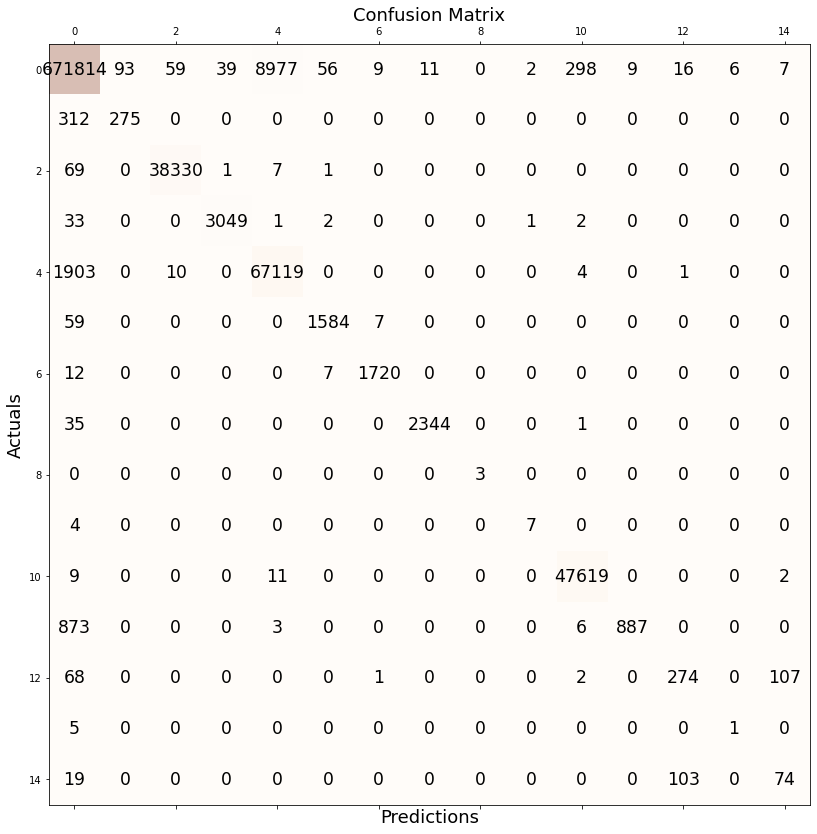

In [30]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_predict)
fig, ax = plt.subplots(figsize=(14, 14))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
        
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
fig.savefig('Confusion matrix.png')
#tree.plot_tree(DT)

[Text(287.6364409478973, 215.7673846153846, 'X[3] <= 19.053\ngini = 0.343\nsamples = 1979513\nvalue = [1589924, 1369, 89617, 7205, 161087, 3849, 4057, 5555\n8, 25, 111163, 4128, 1055, 15, 456]'),
 Text(245.59938123094426, 212.42215384615383, 'X[14] <= -0.457\ngini = 0.224\nsamples = 1808246\nvalue = [1587962, 1369, 33139, 2460, 53079, 3846, 4057, 5555, 0\n25, 111104, 4128, 1054, 14, 454]'),
 Text(179.61082169817138, 209.07692307692307, 'X[11] <= -0.137\ngini = 0.593\nsamples = 494660\nvalue = [288708, 356, 32591, 1821, 52572, 2058, 2005, 39, 0\n1, 111075, 2045, 941, 8, 440]'),
 Text(126.64306398171593, 205.7316923076923, 'X[14] <= -0.46\ngini = 0.42\nsamples = 341061\nvalue = [253574, 1, 32550, 1821, 45835, 1953, 1146, 13, 0, 0\n735, 2044, 941, 8, 440]'),
 Text(42.218130582357674, 202.38646153846153, 'X[5] <= -0.012\ngini = 0.308\nsamples = 306292\nvalue = [250548, 1, 813, 1821, 45829, 1953, 1146, 13, 0, 0\n735, 2044, 941, 8, 440]'),
 Text(2.340732208294391, 199.04123076923076, 'X[13] 

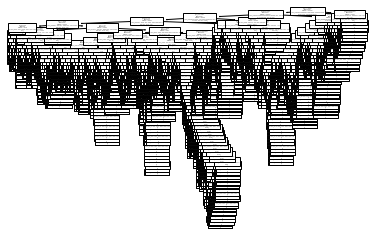

In [31]:
tree.plot_tree(DT)

# 